In [5]:
import numpy as pd
from keras import layers, models
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt


In [6]:
# datos de entrenamiento y test del dataset
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [7]:
# tenemos 60 mil imagenes de numeros
train_data.shape

(60000, 28, 28)

el numero de la imagen es un:  7


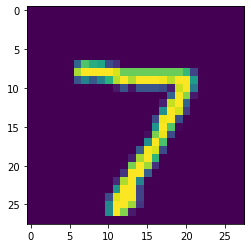

In [8]:
print("el numero de la imagen es un: ", test_labels[0])
plt.imshow(test_data[0])

In [9]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))

2022-07-25 16:29:15.611543: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-07-25 16:29:15.612164: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-25 16:29:15.612423: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [10]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# transformamos la data a 2 dimenciones y en valores entre 0 y 1
x_train = train_data.reshape((60000,28*28))
x_train = x_train.astype('float32')/255

x_test = test_data.reshape((10000,28*28))
x_test = x_test.astype('float32')/255

In [14]:
# one hot de los labels 
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
print(test_labels[0])
print(y_test[0])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


## Entrenamiento del model

In [15]:
#  epochs => iteraciones 
model.fit(x_train, y_train, epochs=5, batch_size= 128)

2022-07-25 16:47:16.930085: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-07-25 16:47:16.949831: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2995195000 Hz


Epoch 1/5
469/469 [==============================] - 9s 18ms/step - loss: 0.4263 - accuracy: 0.8776
Epoch 2/5
469/469 [==============================] - 8s 18ms/step - loss: 0.1100 - accuracy: 0.9675
Epoch 3/5
469/469 [==============================] - 9s 19ms/step - loss: 0.0696 - accuracy: 0.9802
Epoch 4/5
469/469 [==============================] - 10s 21ms/step - loss: 0.0479 - accuracy: 0.9855
Epoch 5/5
469/469 [==============================] - 13s 27ms/step - loss: 0.0355 - accuracy: 0.9900


## Evaluando sobre data de test

In [16]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0646 - accuracy: 0.9811


[0.06460491567850113, 0.9811000227928162]